# Performance Stats

In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = 1/2.54
sns.set_theme(context='paper', style='whitegrid', palette='deep', rc={'figure.figsize':(14*cm, 10*cm)})

In [2]:
stats_base_path = Path("../performance/stats/")
dtnd_spool_stats = sorted(stats_base_path.glob("dtnd-spool*"))[-1]
monntpy_ingest_stats = sorted(stats_base_path.glob("monntpy-ingest*"))[-1]
monntpy_spool_stats = sorted(stats_base_path.glob("monntpy-spool*"))[-1]
monntpy_allonline_stats = sorted(stats_base_path.glob("monntpy-allonline*"))[-1]

In [3]:
def make_table(df):
    df = df.groupby("num_articles").describe().drop("25%", axis=1, level=1).drop("75%", axis=1, level=1).rename(columns={"50%": "median"})
    df["count"] = df["elapsed"]["count"].astype("int64")
    df.drop("count", axis=1, level=1, inplace=True)
    return df.reset_index().set_index(["num_articles", "count"])

## Ingestion Performance

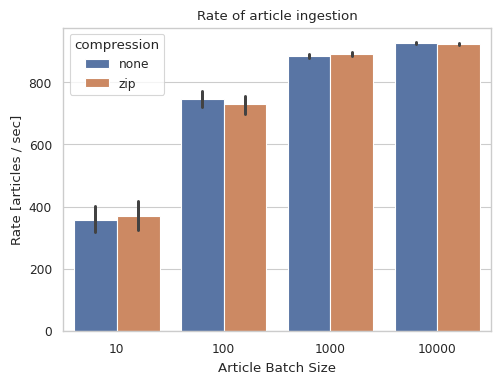

In [5]:
df_ingest = pd.read_csv(monntpy_ingest_stats, sep=";")
g = sns.barplot(data=df_ingest, x="num_articles", y="rate", hue="compression")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]', title="Rate of article ingestion")

# sns.despine()
plt.savefig("figures/ch6_eval_monntpy_ingest.pdf")

In [6]:
table_ingest = make_table(df_ingest)

with open("tables/ch6_ingest_table.tex", "w") as fh:
    fh.write(table_ingest.style.to_latex())

table_ingest

elapsed                                           rate  \
                         mean       std     min   median     max        mean   
num_articles count                                                             
10           100     0.031590  0.010370   0.012   0.0340   0.060  363.254900   
100          60      0.137317  0.015037   0.112   0.1380   0.175  736.602900   
1000         30      1.127567  0.017284   1.101   1.1285   1.178  887.064667   
10000        20     10.826450  0.059731  10.696  10.8180  10.973  923.689900   

                                                            
                           std      min    median      max  
num_articles count                                          
10           100    155.092032  166.666  294.1170  833.333  
100          60      78.310027  571.428  724.6370  892.857  
1000         30      13.474047  848.896  886.1315  908.265  
10000        20       5.089949  911.327  924.3850  934.928

## Spool Performance

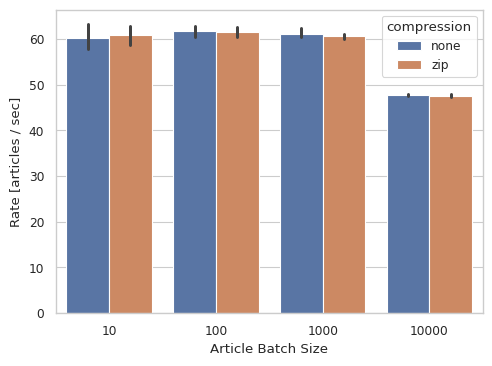

In [7]:
df_monntpy_spool = pd.read_csv(monntpy_spool_stats, sep=";")

g = sns.barplot(data=df_monntpy_spool, x="num_articles", y="rate", hue="compression")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

plt.savefig("figures/ch6_eval_monntpy_spool.pdf")

In [8]:
table_monntpy_spool = make_table(df_monntpy_spool)

with open("tables/ch6_monntpy_spool_table.tex", "w") as fh:
    fh.write(table_monntpy_spool.style.to_latex())

table_monntpy_spool

elapsed                                        \
                         mean       std      min    median      max   
num_articles count                                                    
10           100      0.16820  0.022753    0.091    0.1655    0.263   
100          60       1.62745  0.088006    1.458    1.6250    2.004   
1000         30      16.42010  0.412451   14.637   16.4440   17.206   
10000        20     209.95420  2.181286  204.139  210.2890  212.943   

                         rate                                     
                         mean       std     min  median      max  
num_articles count                                                
10           100    60.553040  8.766840  38.022  60.423  109.890  
100          60     61.613200  3.173784  49.900  61.538   68.587  
1000         30     60.940267  1.640799  58.119  60.812   68.320  
10000        20     47.633900  0.502739  46.960  47.553   48.986

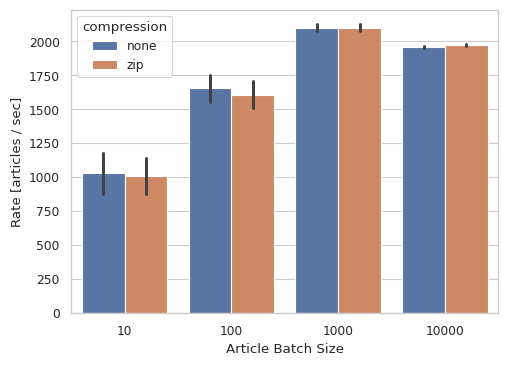

In [9]:
df_dtnd_spool = pd.read_csv(dtnd_spool_stats, sep=";")

g = sns.barplot(data=df_dtnd_spool, x="num_articles", y="rate", hue="compression")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

plt.savefig("figures/ch6_eval_dtnd_spool.pdf")

In [10]:
table_dtnd_spool = make_table(df_dtnd_spool)

with open("tables/ch6_dtnd_spool_table.tex", "w") as fh:
    fh.write(table_dtnd_spool.style.to_latex())

table_dtnd_spool

elapsed                                         rate  \
                        mean       std    min  median    max         mean   
num_articles count                                                          
10           100    0.012970  0.007103  0.004  0.0090  0.024  1018.688390   
100          60     0.063167  0.011237  0.048  0.0650  0.090  1630.372600   
1000         30     0.476233  0.011196  0.455  0.4795  0.494  2100.942267   
10000        20     5.087850  0.047174  5.001  5.0765  5.169  1965.626550   

                                                               
                           std       min     median       max  
num_articles count                                             
10           100    494.127929   416.666  1111.1110  2500.000  
100          60     275.327513  1111.111  1538.4610  2083.333  
1000         30      49.808091  2024.291  2085.5075  2197.802  
10000        20      18.193707  1934.610  1969.8615  1999.600

## Sequential Client Transfer Performance

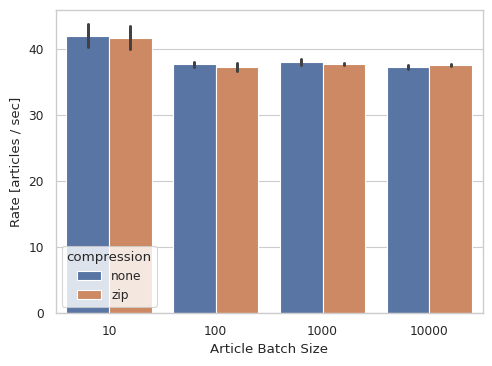

In [11]:
df_seq = pd.read_csv(monntpy_allonline_stats, sep=";")

g = sns.barplot(data=df_seq, x="num_articles", y="rate", hue="compression")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

plt.savefig("figures/ch6_eval_monntpy_allonline.pdf")

In [11]:
table_seq = make_table(df_seq)

with open("tables/ch6_seq_table.tex", "w") as fh:
    fh.write(table_seq.style.to_latex())

table_seq

elapsed                                        \
                          mean       std      min    median      max   
num_articles count                                                     
10           50       0.249180  0.028535    0.178    0.2525    0.376   
100          30       2.719833  0.118552    2.471    2.7265    2.897   
1000         15      27.428000  0.337180   26.768   27.4530   28.013   
10000        10     272.862200  2.184124  268.539  272.9465  276.805   

                         rate                                     
                         mean       std     min   median     max  
num_articles count                                                
10           50     40.624220  4.541988  26.595  39.6035  56.179  
100          30     36.836067  1.653272  34.518  36.6765  40.469  
1000         15     36.463800  0.449339  35.697  36.4250  37.358  
10000        10     36.650300  0.293892  36.126  36.6370  37.238

In [12]:
df_seq.describe()

,num_articles,elapsed,rate
count,105.000000,105.000000,105.000000
mean,1128.571429,30.800914,38.569076
std,2911.464880,79.449979,3.795624
min,10.000000,0.178000,26.595000
25%,10.000000,0.256000,36.496000
50%,100.000000,2.504000,37.313000
75%,100.000000,2.868000,39.682000
max,10000.000000,276.805000,56.179000
